---
title: Bifurcation diagram
permalink: bifurcation/
layout: page
---

# Introduction

> Starting from the logistic model of growth with competition, you will (i)
> propose an analysis to show how we can find a vaalue of the growth rate *r*
> after which the population cannot persist (this will involve finding the
> maximum of a function, and then iterating this function enough times from this
> maximum), and (ii) plot the bifurcation diagram of the logistic model to show
> that there is indeed a maximal growth rate after which the system becomes
> unstable. Please note that you should not attempt to calculate this value by
> hand, but you may attempt to guess it based on the results of the second step.

## Required packages

```julia
using Plots
```

## Model description and justification

<!-- Use this model, it assumes that K = 1, making the system dimensionless -->

$$n(t+1) = n(t) + r\times n(t)\times \left(1-n(t)\right)$$

## Model analysis

Testing deployment

## Simulations

## Conclusions

In [5]:
using Plots

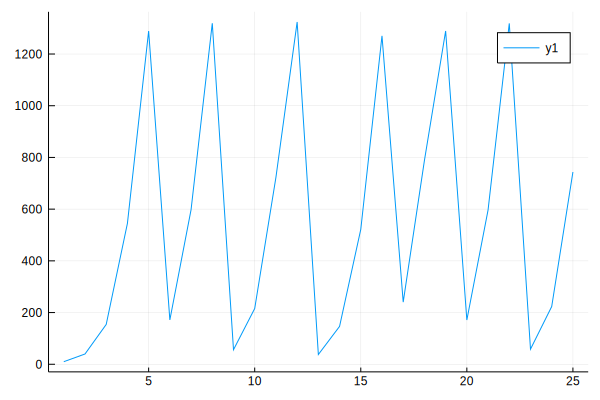

In [10]:

function logistic_growth(n::Float64, r::Float64)
    return (n+(r*n*(1-(n/1000))))
end

pop_size = zeros(Float64, 25)
pop_size[1] = 10.0


for i in 2:length(pop_size)
    pop_size[i] = logistic_growth(pop_size[i-1], 3.0)
end

plot(pop_size)

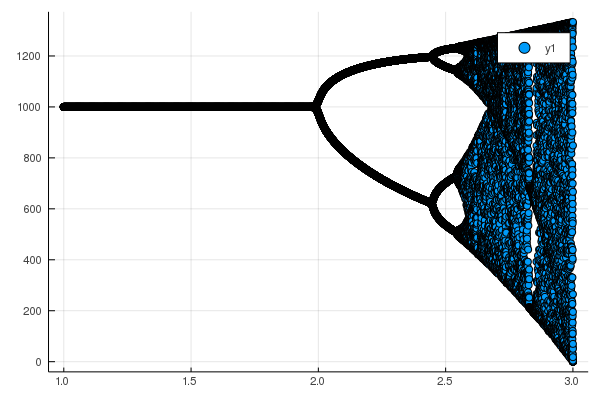

In [3]:
growth_rate = collect(1:0.001:3)

function logistic_growth(n::Float64, r::Float64)
    return (n + (r*n*(1-(n/1000))))
end

pop_size = zeros(Float64, 200)
pop_size[1] = 10.0

growth_rate_actual = zeros(Float64, 200)

data_x = Float64[]
data_y = Float64[]
for r in 1:0.001:3
    for i in 2:length(pop_size)
        pop_size[i] = logistic_growth(pop_size[i-1], r)
        growth_rate_actual[i-1] = r
        growth_rate_actual[i] = r
    end
#     print(r)
    data_x = vcat(data_x, growth_rate_actual[181:200])
    data_y = vcat(data_y, pop_size[181:200])
end

scatter(data_x, data_y, fmt = :png)


In [1]:
a = [1 2 3]
b = [1 2 3]

scatter(a,b)

UndefVarError: UndefVarError: scatter not defined

In [15]:
# Notes cours 2

# important de mettre 1.0
function f(n::Float64, r::Float64)
    return n + r*n*(1.0-n) 
end

# si on veut optimiser car la fonction fait une ligne
#f(n::Float64, r::Float64) = n + r*n*(1.0-n)

# autre notation
#f = (n::Float64, r::Float64) -> n + r*n*(1.0-n)


f (generic function with 1 method)

In [2]:
f(0.0, 1.0)

0.0

In [3]:
f(1.0, 1.0)

1.0

In [4]:
f(0, 1)

MethodError: MethodError: no method matching f(::Int64, ::Int64)

[0.05, 0.0, 0.0, 0.0, 0.0]
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


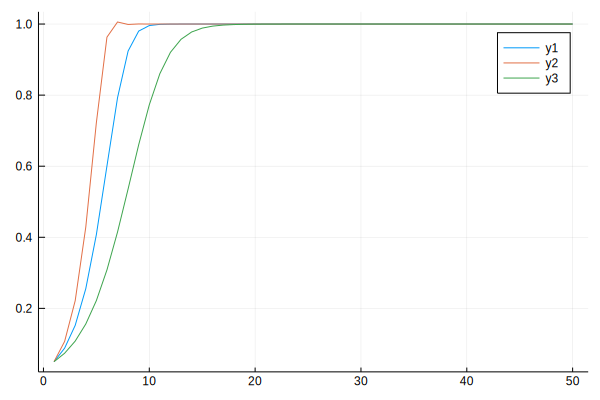

In [24]:
#n0 = 0.01
r = 0.5

# important de mettre 1.0
function f(n::Float64, r::Float64)
    return n + r*n*(1.0-n) 
end

#!!! Dans julia vecteur = colonne!!!
#n1 = f(no, r)
#n2 = f(n1, r)

n = zeros(Float64, 50)
#nt[1] = rand()

# eps: plus petit nombre au dessus de zéro qu'on peut représenter
#nt[1] = eps()

n[1] = 0.05

#On représente éléments de 1 à 5
println(n[1:5])

# On représente la dernière valeur
println(n[end])

# on représente les 5 dernières valeurs
println(n[(end-5):end])

#alternative 1
#for t in 2:length(n)
#    n[t] = f(n[t-1], r)    
#end

#alternative 2
for t in 1:(length(n)-1)
    n[t+1] = f(n[t], r)
end

plot!(n)

#plus on diminue r plus ça prend du temps avant d'arriver à l'équilibre où n =1 
#plus on augmente r plus ça va dépasser la capacité de soutien avant de se restabiliser, plus on augmente plus éventuellement on va aller en dessous de n = 0

In [27]:
import Pkg
Pkg.activate(".")
Pkg.add("DifferentialEquations")

Activating new environment at `~/homework/homework/Project.toml`
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed Requires ────────────── v1.0.0
 Installed VertexSafeGraphs ────── v0.1.1
 Installed FillArrays ──────────── v0.8.4
 Installed DataStructures ──────── v0.17.9
 Installed ForwardDiff ─────────── v0.10.9
 Installed DiffEqBase ──────────── v6.12.2
 Installed DifferentialEquations ─ v6.10.1
 Installed OrdinaryDiffEq ──────── v5.27.1
 Installed StochasticDiffEq ────── v6.17.1
  Updating `~/homework/homework/Project.toml`
  [0c46a032] + DifferentialEquations v6.10.1
  Updating `~/homework/homework/Manifest.toml`
  [79e6a3ab] + Adapt v1.0.0
  [ec485272] + ArnoldiMethod v0.0.4
  [4fba245c] + ArrayInterface v2.3.1
  [4c555306] + ArrayLayouts v0.1.5
  [aae01518] + BandedMatrices v0.14.2
  [9e28174c] + BinDeps v1.0.0
  [b99e7846] + BinaryProvider v0.5.8
  [764a87c0] + Boun

In [28]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1242


In [29]:
# diff. equa. prend la fonction f, un vecteur u, le temps t et un objet p comprenant les paramètres
#differential equations calcule les pas de temps qui sont importants, ceux qu'il a besoin
u = [0.01, 0.01] #conditions initiales proies et pred
t = (0., 100.)
p = [1.1, 0.3, 0.4, 0.1, 0.05] #r, alpha, beta, gamma, delta

function hp(u, p, t) #hote-parasite, diff, equa. prends ces arguments la dans cette ordre
    x, y = u 
    r, a, b, g, d = p
    dx = r*x - a*x*x - b*x*y
    dy = g*x*y - d*y
    return [dx, dy]
end


hp (generic function with 1 method)

In [30]:
hp(u, p, t)

2-element Array{Float64,1}:
  0.01093
 -0.00049

In [31]:
problem = ODEProblem(hp, u, t, p) #ODE = équa diff ordinaire

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: [0.01, 0.01]

In [32]:
solution = solve(problem)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 36-element Array{Float64,1}:
   0.0                
   0.10547771619560291
   0.35787802117231676
   0.6952349037499825 
   1.1043240201332782 
   1.5936793468224901 
   2.156937703855757  
   2.7941624551054196 
   3.50344075821046   
   4.288317626755028  
   5.15974069150388   
   6.204081578611511  
   7.252086608323185  
   ⋮                  
  37.515677074873     
  41.984783637101586  
  46.494763755553464  
  51.486299903299575  
  56.85805307599681   
  62.51419947010109   
  67.84277946172921   
  74.60414726588147   
  81.34121414689503   
  88.47969823666801   
  97.57259518895559   
 100.0                
u: 36-element Array{Array{Float64,1},1}:
 [0.01, 0.01]                                
 [0.011221755667428175, 0.009948512125665129]
 [0.014783594002381474, 0.009826955017519654]
 [0.02135928531473514, 0.009668412953628356] 
 [0.03333524524282519, 0.009483092573068843] 
 [0.056634275701435366, 0.0

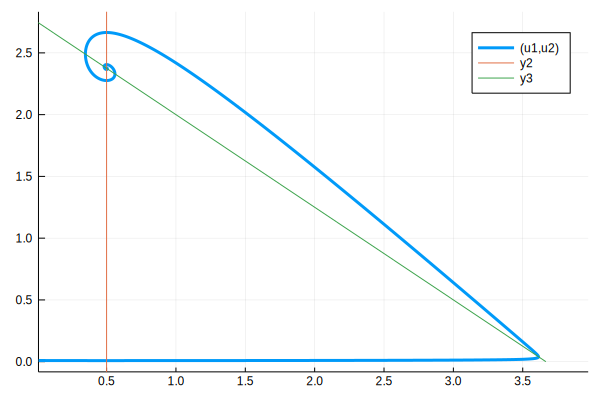

In [36]:
#plot(solution)
#plotdensity permet de choisir le nombre de point utilisé pour dessiner plot, vars permet de représenter les variable sur les axes
plot(solution, plotdensity = 1000, vars=(1,2)) 

vline!([0.05/0.1]) #permet de tracer l'isocline prédateur
plot!([0.0, 1.1/0.3], [1.1/0.4, 0.0]) #permet de tracer isocline proie


In [ ]:
#POUR VOIR SI LE SYSTÈME EST SENSIBLE AUX COND INIT, le faire partir de pleins d'endroit différents en changeant u et voir ou on arrive

for i in 1:100
    u = [rand()*3, rand()*3]
    prob = ODEProblem(hp, u, t,p)
    sol = solve(prob)
    plot!(sol, vars=(1,2), lw=1, c=:grey)
end

xaxis!("Preys")
yaxis!("Predators")